In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm 
import seaborn as sns

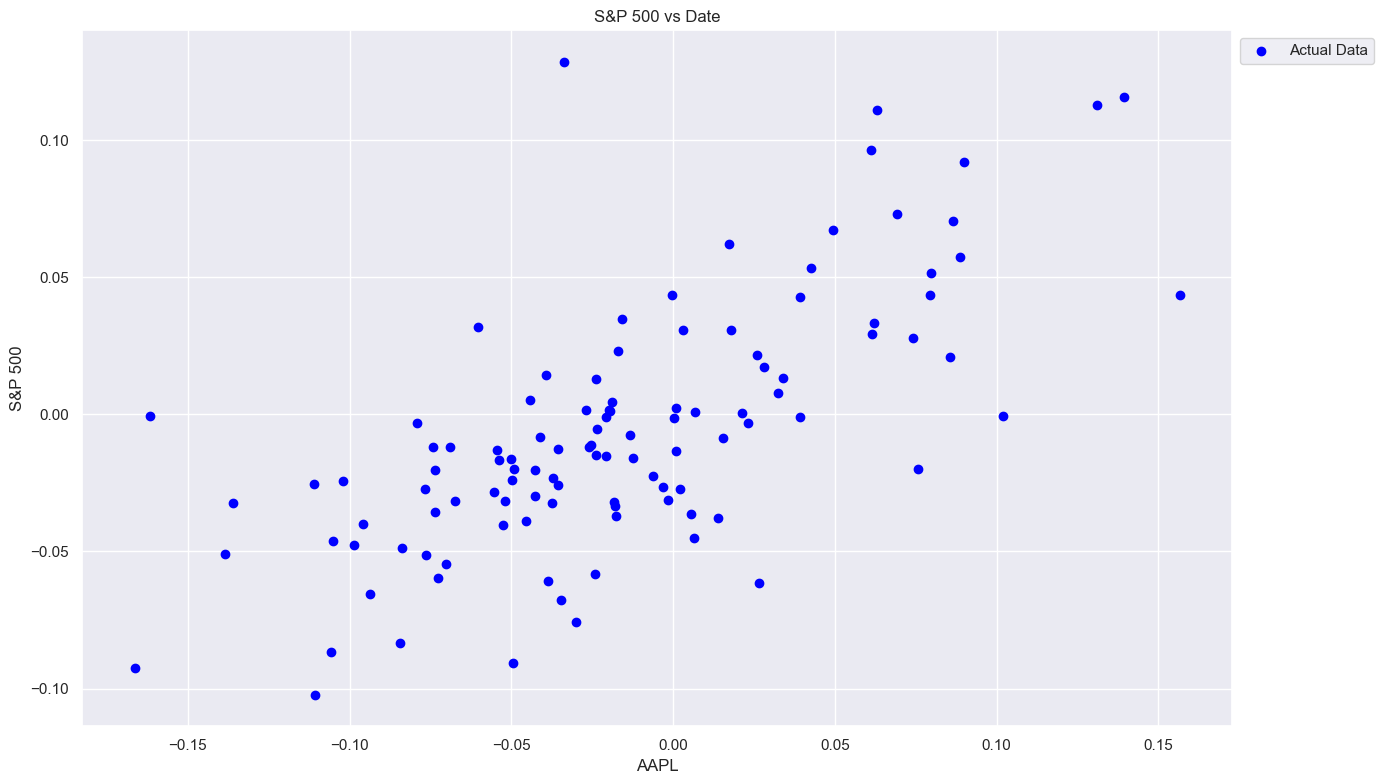

In [11]:
# Load the combined data
combined_data = pd.read_csv("combined data.csv")

# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Set the 'Date' column as the index
combined_data.set_index('Date', inplace=True)

# Plot the data and the line of best fit
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Plot the actual data as a scatter plot
plt.scatter(combined_data["AAPL"], combined_data['SP_500'], label="Actual Data", color='blue')

plt.xlabel('AAPL')
plt.ylabel('S&P 500')
plt.title('S&P 500 vs Date')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [12]:
# Load the combined data
combined_data = pd.read_csv("Combined Data.csv")

# Convert the 'Date' column to datetime format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors='coerce')

# Set the 'Date' column as the index
combined_data.set_index('Date', inplace=True)

# Specify the dependent variable (Y) and the independent variable (X)
# Using the formula interface
formula = 'SP_500 ~ AAPL'  # Example: using AAPL as the dependent variable

# Fit the model using the formula interface
model = ols(formula, data=combined_data).fit()

# Print the summary of the model
print(model.summary())

# Perform an analysis of variance (ANOVA)
print(anova_lm(model))

                            OLS Regression Results                            
Dep. Variable:                 SP_500   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     98.96
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           5.61e-17
Time:                        15:35:54   Log-Likelihood:                 221.35
No. Observations:                 111   AIC:                            -438.7
Df Residuals:                     109   BIC:                            -433.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0022      0.003      0.678      0.4

$$\hat{y} = 0.0022 + 0.5035 x$$

This means that, as Apple Stock has a 1 unit increase in stock return, the S&P 500 is predicted to have a stock return of 0.5035.

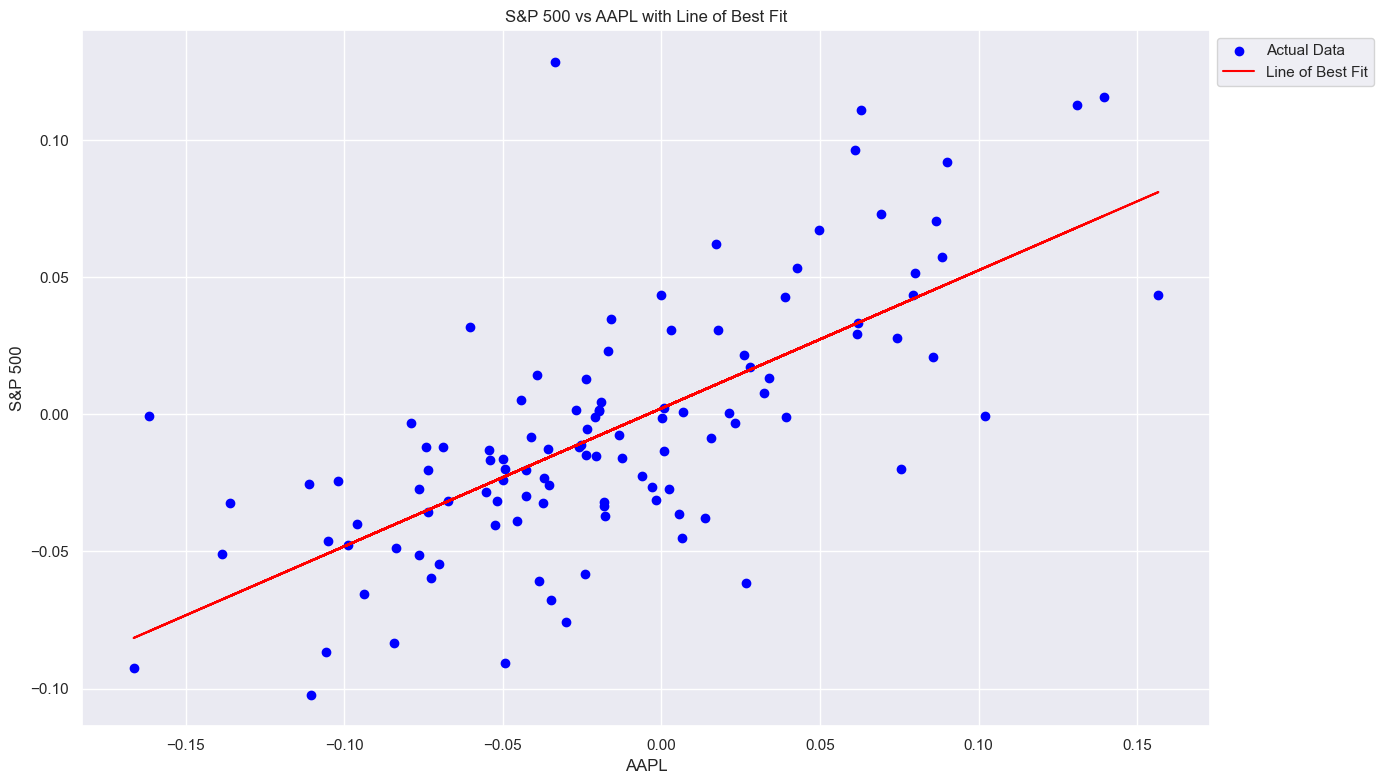

In [14]:
combined_data['Predicted'] = model.params['Intercept'] + model.params['AAPL'] * combined_data['AAPL']

# Plot the data and the line of best fit
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Plot the actual data as a scatter plot
plt.scatter(combined_data['AAPL'], combined_data['SP_500'], label="Actual Data", color='blue')

# Plot the regression line
plt.plot(combined_data['AAPL'], combined_data['Predicted'], label="Line of Best Fit", color='red')

plt.xlabel('AAPL')
plt.ylabel('S&P 500')
plt.title('S&P 500 vs AAPL with Line of Best Fit')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()
